This is my notebook for the flood competition on Kaggle. The goal is to predict classes 

In [5]:
# add the repo where utilities is stored
import sys
sys.path.append('/Users/avicenne/Documents/python/Project-github/')

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import utilities_plot
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
import seaborn as sns
# LSTM model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

train = pd.read_csv('/Users/avicenne/Documents/python/kaggle/Flood_predict/train.csv')
test = pd.read_csv('/Users/avicenne/Documents/python/kaggle/Flood_predict/test.csv')
train.head(3)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530


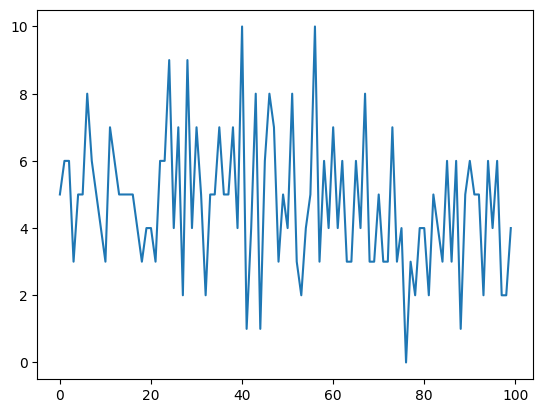

In [2]:
plt.plot(train.MonsoonIntensity[:100])

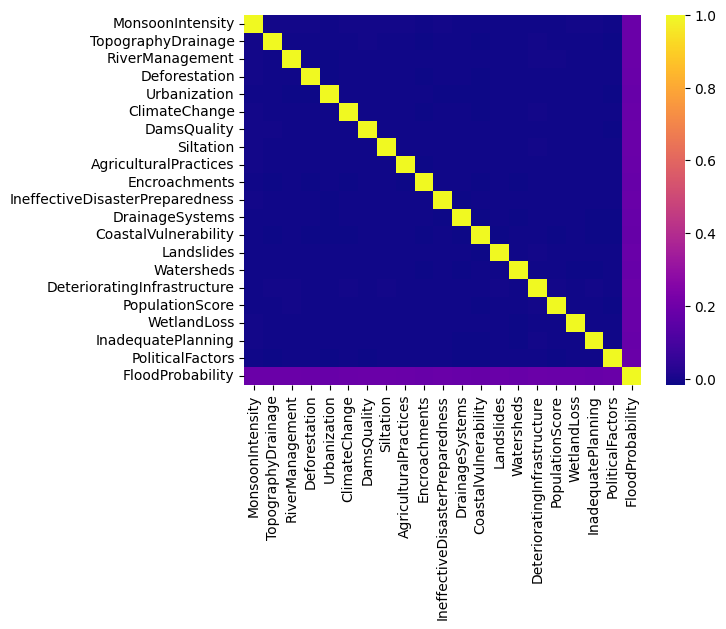

In [3]:
train_corr = train.drop(['id'],axis=1)

# see correlation
correlation = train_corr.corr()
sns.heatmap(correlation, cmap = 'plasma')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'MonsoonIntensity'),
  Text(1, 0, 'TopographyDrainage'),
  Text(2, 0, 'RiverManagement'),
  Text(3, 0, 'Deforestation'),
  Text(4, 0, 'Urbanization'),
  Text(5, 0, 'ClimateChange'),
  Text(6, 0, 'DamsQuality'),
  Text(7, 0, 'Siltation'),
  Text(8, 0, 'AgriculturalPractices'),
  Text(9, 0, 'Encroachments'),
  Text(10, 0, 'IneffectiveDisasterPreparedness'),
  Text(11, 0, 'DrainageSystems'),
  Text(12, 0, 'CoastalVulnerability'),
  Text(13, 0, 'Landslides'),
  Text(14, 0, 'Watersheds'),
  Text(15, 0, 'DeterioratingInfrastructure'),
  Text(16, 0, 'PopulationScore'),
  Text(17, 0, 'WetlandLoss'),
  Text(18, 0, 'InadequatePlanning'),
  Text(19, 0, 'PoliticalFactors')])

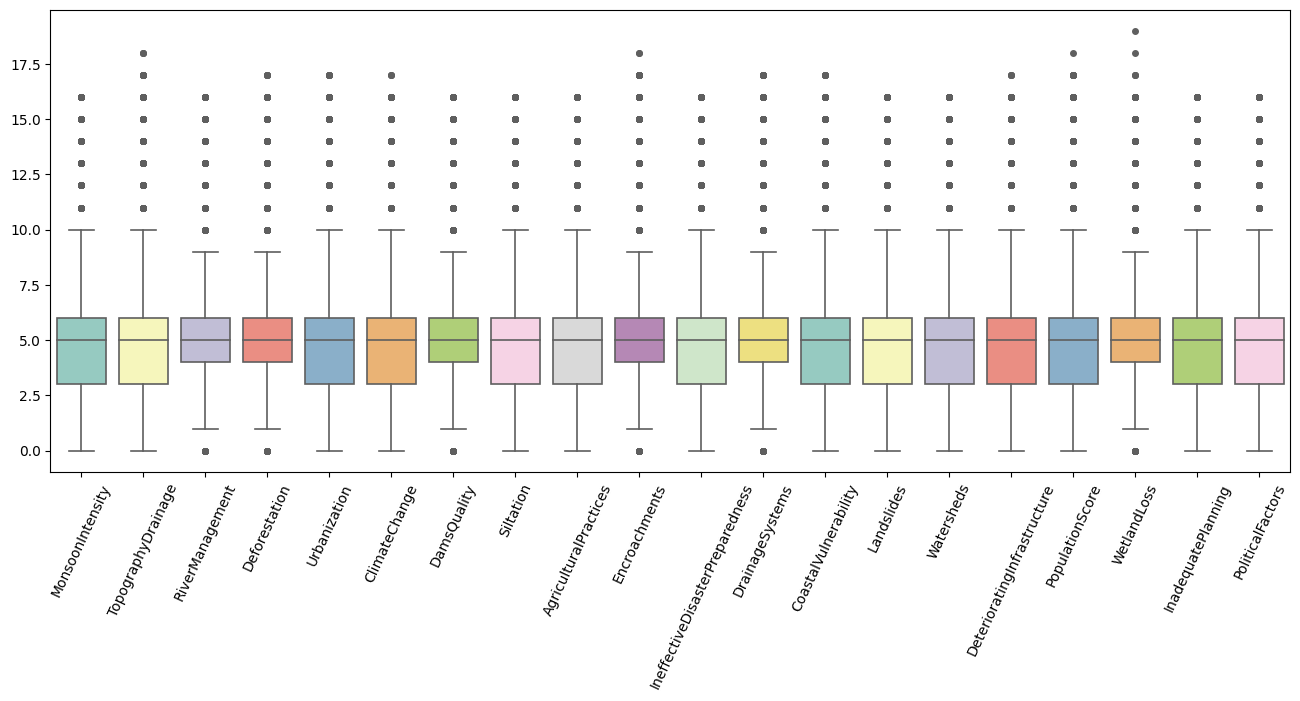

In [4]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=train_corr.drop(['FloodProbability'], axis=1),
            palette='Set3', linewidth=1.2, fliersize=2,
            flierprops=dict(marker='o', markersize=4))
plt.xticks(rotation=65)

In [5]:
# ligth preprocess
df_train = train.drop(['FloodProbability'],axis=1)
df_train = df_train.drop(['id'],axis=1)
id_test = test.id
df_test = test.drop(['id'],axis=1)

# we norm
norm = MinMaxScaler()
df_train = norm.fit_transform(df_train)
df_test = norm.transform(df_test)

# we split
x_train, x_val, y_train, y_val = train_test_split(df_train,
                                                  train['FloodProbability'],
                                                  test_size = 0.3, random_state = 42)
x_train.shape

(782569, 20)

# Using Elastic Net

In [6]:
from sklearn.linear_model import ElasticNet

# Normaliser les données (important pour les modèles de régression pénalisés)
scaler = StandardScaler()
norm_train = scaler.fit_transform(x_train)
norm_val = scaler.transform(x_val)

EN = ElasticNet()

EN.fit(norm_train, y_train)

pred_net = EN.predict(norm_val)

print("MSE LogisticRegression: " + str(mean_squared_error(pred_net, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred_net))

MSE LogisticRegression: 0.0025998132873219786
Coefficient de détermination (R2) : -1.1294868993427798e-06


In [7]:
# Logistic regression :
lr = LinearRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_val)
print("MSE LogisticRegression: " + str(mean_squared_error(pred, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred))

MSE LogisticRegression: 0.00040278835872487745
Coefficient de détermination (R2) : 0.8450700995978224


In [8]:
pred_test = lr.predict(df_test)
result_df = pd.DataFrame({'id': id_test, 'FloodProbability': pred_test})

In [9]:
import xgboost as xgb
from xgboost import XGBRegressor

XGB = XGBRegressor()

XGB.fit(x_train, y_train)

pred_xgb = XGB.predict(x_val)

print("MSE LogisticRegression: " + str(mean_squared_error(pred_xgb, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred_xgb))

MSE LogisticRegression: 0.0004951770078823996
Coefficient de détermination (R2) : 0.8095334116518742


In [10]:
pred_test = XGB.predict(df_test)
result_df = pd.DataFrame({'id': id_test, 'FloodProbability': pred_test})
result_df.to_csv('submission.csv', index=False)

In [11]:
from catboost import CatBoostRegressor

Cat = CatBoostRegressor(iterations=100,
                        learning_rate=0.1,
                        depth=3, loss_function='RMSE',
                        random_seed=0, verbose=0)

Cat.fit(x_train, y_train)

pred_cat = Cat.predict(x_val)

print("MSE LogisticRegression: " + str(mean_squared_error(pred_cat, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred_cat))

MSE LogisticRegression: 0.0009954868310986706
Coefficient de détermination (R2) : 0.6170925195503407


In [12]:
rf = RandomForestRegressor(n_estimators = 100) 
rf.fit(x_train, y_train)

pred = rf.predict(x_val)
print("MSE LogisticRegression: " + str(mean_squared_error(pred, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred))


MSE LogisticRegression: 0.0009020147612466755
Coefficient de détermination (R2) : 0.6530459381605508


In [13]:
# reshape the dataset
reshape_train = np.array(x_train).reshape((x_train.shape[0], x_train.shape[1], 1))
reshape_val = np.array(x_val).reshape((x_val.shape[0], x_val.shape[1], 1))

# LSTM model
# we build the model : 
"""lstm = Sequential()
lstm.add(LSTM(units=128, return_sequences=True, input_shape=(reshape_train.shape[1], reshape_train.shape[2])))
lstm.add(LSTM(units=128))
lstm.add(Dropout(0.2))
lstm.add(Dense(1))
"""
lstm = Sequential()
lstm.add(LSTM(units=128, input_shape=(reshape_train.shape[1], reshape_train.shape[2])))
lstm.add(Dropout(0.2))
lstm.add(Dense(1))

lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm.fit(reshape_train, y_train, epochs = 10, batch_size = 128)
pred = lstm.predict(reshape_val)

print("MSE LogisticRegression: " + str(mean_squared_error(pred, y_val)))
print("Coefficient de détermination (R2) :",r2_score(y_val, pred))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 222s 36ms/step - loss: 0.0027
Epoch 2/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 220s 36ms/step - loss: 4.5721e-04
Epoch 3/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 220s 36ms/step - loss: 4.1938e-04
Epoch 4/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 221s 36ms/step - loss: 4.1551e-04
Epoch 5/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 220s 36ms/step - loss: 4.1259e-04
Epoch 6/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 221s 36ms/step - loss: 4.0951e-04
Epoch 7/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 262s 36ms/step - loss: 4.0663e-04
Epoch 8/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 222s 36ms/step - loss: 4.0784e-04
Epoch 9/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 261s 36ms/step - loss: 4.0609e-04
Epoch 10/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 265s 37ms/step - loss: 4.0593e-04
10481/10481 ━━━━━━━━━━━━━━━━━━━━ 99s 9ms/step
MSE LogisticRegression: 0.00039675191439902534
Coefficient de détermination (R2) : 0.8473919783163342
